In [1]:
import keras
import tensorflow as tf 
import matplotlib.pyplot as plt
from keras import preprocessing
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score

from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import Sequential

In [2]:
data_path = r'C:\Users\CEA\Downloads\Pneumonia\chest_xray'

In [3]:
img_dims = 64
#batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(directory=data_path+'\\train',
                target_size = (img_dims, img_dims),
                batch_size = 1000,
                class_mode = 'binary',
                shuffle= True)

test_set = test_datagen.flow_from_directory(directory=data_path+'\\test',
            target_size = (img_dims, img_dims),
            batch_size = 100,
            class_mode = 'binary',
            shuffle = True)



Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [4]:
type(training_set)

keras.preprocessing.image.DirectoryIterator

In [5]:
# extracting x and y
for x_train,y_train in training_set:
    break

for x_test,y_test in test_set:
    break
    

In [6]:
x_train

array([[[[0.15294118, 0.15294118, 0.15294118],
         [0.25882354, 0.25882354, 0.25882354],
         [0.3254902 , 0.3254902 , 0.3254902 ],
         ...,
         [0.3529412 , 0.3529412 , 0.3529412 ],
         [0.30588236, 0.30588236, 0.30588236],
         [0.25490198, 0.25490198, 0.25490198]],

        [[0.13725491, 0.13725491, 0.13725491],
         [0.25882354, 0.25882354, 0.25882354],
         [0.34117648, 0.34117648, 0.34117648],
         ...,
         [0.30980393, 0.30980393, 0.30980393],
         [0.3019608 , 0.3019608 , 0.3019608 ],
         [0.2392157 , 0.2392157 , 0.2392157 ]],

        [[0.14117648, 0.14117648, 0.14117648],
         [0.28235295, 0.28235295, 0.28235295],
         [0.32941177, 0.32941177, 0.32941177],
         ...,
         [0.3372549 , 0.3372549 , 0.3372549 ],
         [0.26666668, 0.26666668, 0.26666668],
         [0.21176472, 0.21176472, 0.21176472]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [7]:
y_train

array([0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1.

In [8]:
y_test = y_test.astype(int)
y_train = y_train.astype(int)
y_test

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

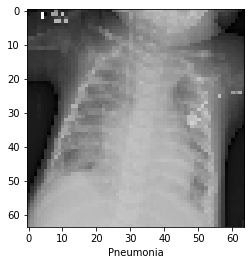

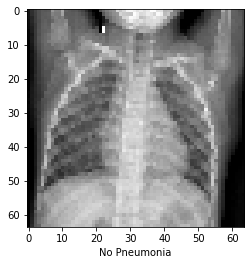

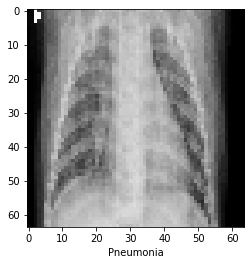

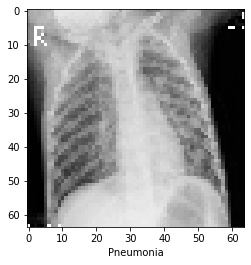

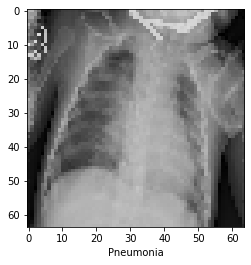

In [9]:
for i in range(95,100):
    image = x_train[i]
    plt.imshow(image)
    if y_train[i]== 1:
        plt.xlabel('Pneumonia')
    else:
        plt.xlabel('No Pneumonia')
    plt.show()        

In [10]:
x_train.shape

(1000, 64, 64, 3)

In [11]:
y_train.shape

(1000,)

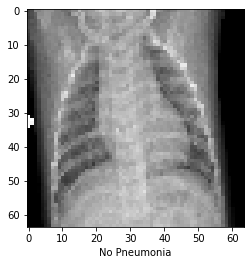

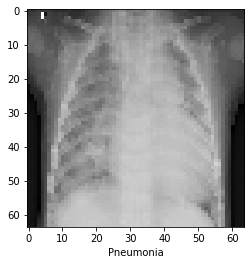

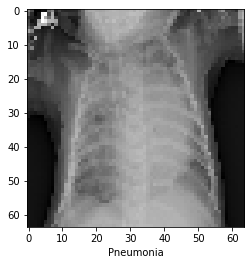

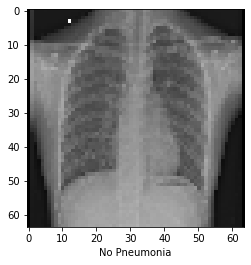

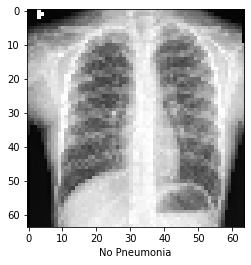

In [12]:
for i in range(10,15):
    image = x_test[i]
    plt.imshow(image)
    if y_test[i]== 1:
        plt.xlabel('Pneumonia')
    else:
        plt.xlabel('No Pneumonia')
    plt.show()  

In [13]:
x_test.shape

(100, 64, 64, 3)

In [14]:
y_test.shape

(100,)

In [15]:
# Let us now make a model

In [16]:

model = Sequential()
model.add(Conv2D(8, (5, 5), input_shape=(64, 64, 3))) # 60 60 8
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4, 4))) # 15 15 8


model.add(Conv2D(16, (4, 4))) # 12 12 16
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # 6 6 16


model.add(Conv2D(32, (5, 5))) # 2 2 32
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # 1 1 32


model.add(Flatten())

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(50))
model.add(Activation('relu'))

model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 8)         608       
                                                                 
 activation (Activation)     (None, 60, 60, 8)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 16)        2064      
                                                                 
 activation_1 (Activation)   (None, 12, 12, 16)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                    

In [17]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x=x_train, y=y_train, batch_size=100, epochs=50, verbose=1)

Epoch 1/50
10/10 [==============================] - 1s 83ms/step - loss: 0.6084 - accuracy: 0.7490
Epoch 2/50
10/10 [==============================] - 1s 92ms/step - loss: 0.5740 - accuracy: 0.7490
Epoch 3/50
10/10 [==============================] - 1s 83ms/step - loss: 0.5654 - accuracy: 0.7490
Epoch 4/50
10/10 [==============================] - 1s 83ms/step - loss: 0.5602 - accuracy: 0.7490
Epoch 5/50
10/10 [==============================] - 1s 94ms/step - loss: 0.5493 - accuracy: 0.7490
Epoch 6/50
10/10 [==============================] - 1s 89ms/step - loss: 0.5268 - accuracy: 0.7490
Epoch 7/50
10/10 [==============================] - 1s 93ms/step - loss: 0.5194 - accuracy: 0.7490
Epoch 8/50
10/10 [==============================] - 1s 94ms/step - loss: 0.4958 - accuracy: 0.7730
Epoch 9/50
10/10 [==============================] - 1s 85ms/step - loss: 0.4380 - accuracy: 0.7990
Epoch 10/50
10/10 [==============================] - 1s 97ms/step - loss: 0.3740 - accuracy: 0.8250
Epoch 11/

In [18]:
history.history

{'loss': [0.6084047555923462,
  0.5740209817886353,
  0.5653983950614929,
  0.5601549744606018,
  0.5493423342704773,
  0.5268463492393494,
  0.5193802118301392,
  0.4957572817802429,
  0.4380283057689667,
  0.37402746081352234,
  0.33708083629608154,
  0.2744268774986267,
  0.2680308520793915,
  0.26802217960357666,
  0.27829307317733765,
  0.22809134423732758,
  0.2518242597579956,
  0.2111852467060089,
  0.24481268227100372,
  0.2700921595096588,
  0.259931355714798,
  0.2338145673274994,
  0.21636904776096344,
  0.2044229805469513,
  0.21891775727272034,
  0.18674181401729584,
  0.17995233833789825,
  0.17593856155872345,
  0.17164233326911926,
  0.1716383546590805,
  0.1593141108751297,
  0.17370907962322235,
  0.24045783281326294,
  0.1944005787372589,
  0.1827455759048462,
  0.19338230788707733,
  0.19977155327796936,
  0.1649135947227478,
  0.1484464555978775,
  0.14791913330554962,
  0.1520514190196991,
  0.15472568571567535,
  0.14668157696723938,
  0.15490826964378357,
  0.1

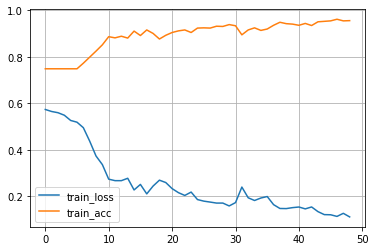

In [19]:
plt.plot(range(49), history.history['loss'][1:], label='train_loss')   # range(epochs-1)
plt.plot(range(49), history.history['accuracy'][1:], label='train_acc') # range(epochs-1)
plt.legend()
plt.grid()
plt.show()

In [20]:
y_predicted = model.predict(x_test)

In [21]:
y_predicted[0:10]

array([[0.98763955],
       [0.99963355],
       [0.9994406 ],
       [0.99976265],
       [0.97089446],
       [0.64792347],
       [0.9989362 ],
       [0.9901036 ],
       [0.9196903 ],
       [0.43600997]], dtype=float32)

In [22]:
for i in range(0,100):
    if y_predicted[i]>0.5:
        y_predicted[i]= 1
    else:
        y_predicted[i]= 0
    

In [23]:
y_predicted= y_predicted.astype(int)

In [24]:
print('Accuracy Score',accuracy_score(y_test,y_predicted))
print('Confusion Matrix\n',confusion_matrix(y_test,y_predicted))
print('Recall', recall_score(y_test,y_predicted))
print('Precission',precision_score(y_test,y_predicted))

Accuracy Score 0.75
Confusion Matrix
 [[15 24]
 [ 1 60]]
Recall 0.9836065573770492
Precission 0.7142857142857143


In [25]:
fpr,tpr,threshold= roc_curve(y_test,model.predict(x_test))

AUC 0.9390500210172341


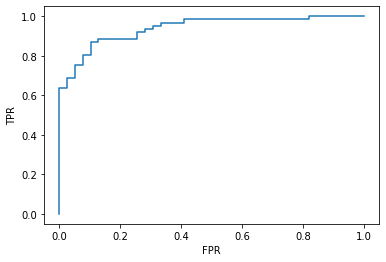

In [26]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
print('AUC',roc_auc_score(y_test,model.predict(x_test)))

In [27]:
# Now let us see some prediction examples

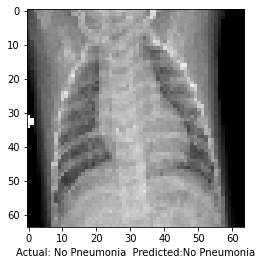

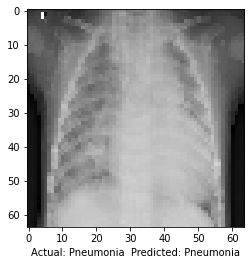

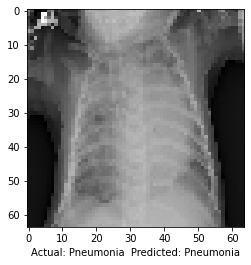

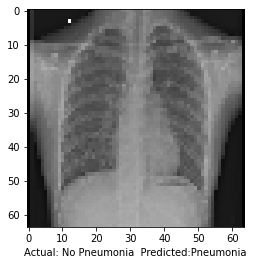

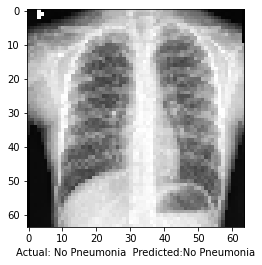

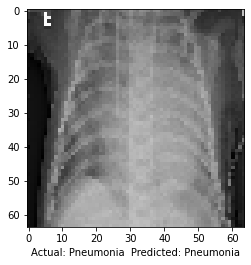

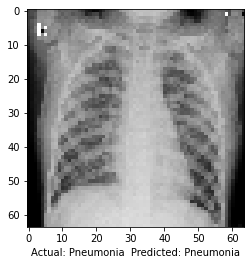

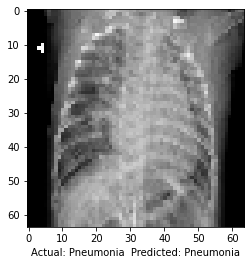

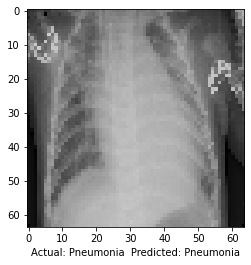

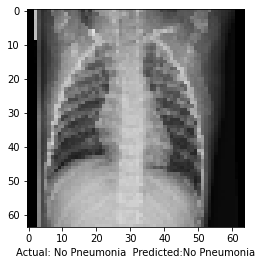

In [28]:
for i in range(10,20):
    image = x_test[i]
    plt.imshow(image)
    if y_test[i]== 1 and y_predicted[i]==1:
        plt.xlabel('Actual: Pneumonia  Predicted: Pneumonia')
    elif y_test[i]== 1 and y_predicted[i]==0:
        plt.xlabel('Actual: Pneumonia  Predicted: No Pneumonia')
    elif y_test[i]== 0 and y_predicted[i]==1:
        plt.xlabel('Actual: No Pneumonia  Predicted:Pneumonia')
    elif y_test[i]== 0 and y_predicted[i]==0:
        plt.xlabel('Actual: No Pneumonia  Predicted:No Pneumonia')
    plt.show()  